# Advanced_Python_week_01

In [151]:
import numpy as np
import pandas as pd

In [152]:
from sklearn.datasets import load_iris

In [153]:
import matplotlib.pyplot as plt

In [154]:
iris = load_iris()

In [155]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [156]:
features = iris['data']
label = iris['target']
feature_names = iris['feature_names']

In [157]:
df = pd.DataFrame(features, columns=feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [158]:
df['target'] = label

In [159]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [160]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

# (1)Histogram

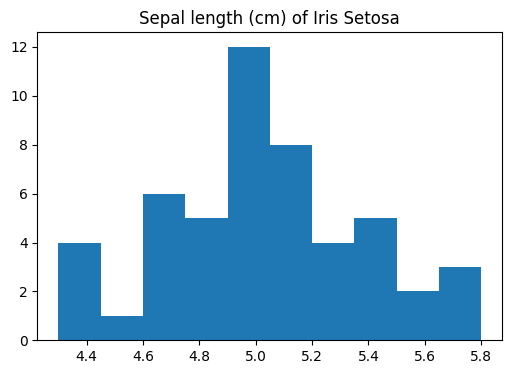

In [161]:
plt.figure(figsize=(6,4))
plt.hist(df0['sepal length (cm)'])
plt.title('Sepal length (cm) of Iris Setosa')
plt.show()

# (2) line graph

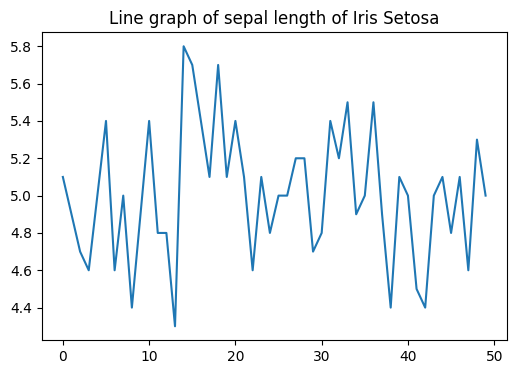

In [162]:
plt.figure(figsize=(6,4))
plt.plot(df0['sepal length (cm)'])
plt.title('Line graph of sepal length of Iris Setosa')
plt.show()

# (3) bar graph

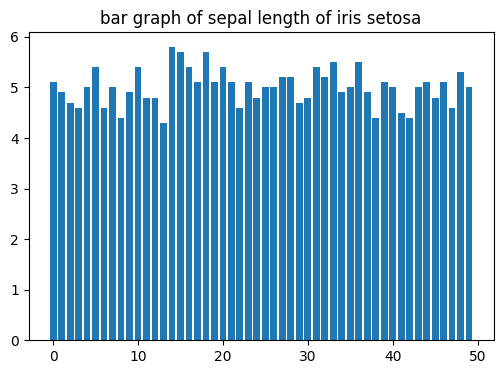

In [163]:
x = np.arange(len(df0)) # bar graph의 x값을 넣어줘야 해서 만들어봤어요.
plt.figure(figsize=(6,4))
plt.bar(x, df0['sepal length (cm)'])
plt.title('bar graph of sepal length of iris setosa')
plt.show()

# (4) box plot

<Figure size 600x400 with 0 Axes>

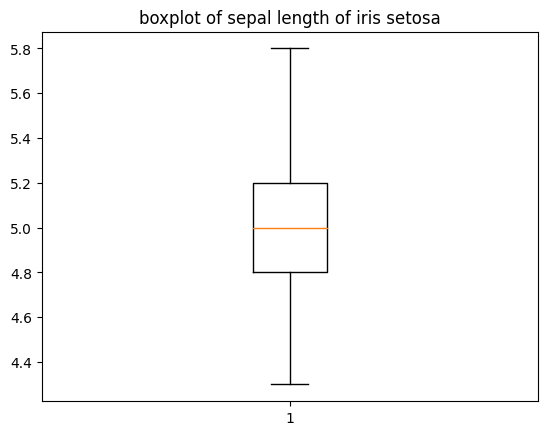

In [164]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
ax.boxplot(df0['sepal length (cm)'])
plt.title('boxplot of sepal length of iris setosa')
plt.show()

# Advanced_Python_week_02

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# (1) Pie Chart

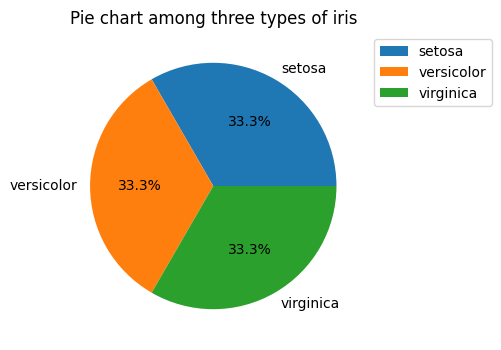

In [166]:
plt.figure(figsize=(6,4))
ratio = [len(df0), len(df1), len(df2)]
labels =['setosa', 'versicolor', 'virginica']
plt.pie(ratio, labels = labels, autopct ='%.1f%%')
plt.title('Pie chart among three types of iris')
plt.legend(loc ='best', bbox_to_anchor=(1,1))
plt.show()

# (2)box plot

<Figure size 600x400 with 0 Axes>

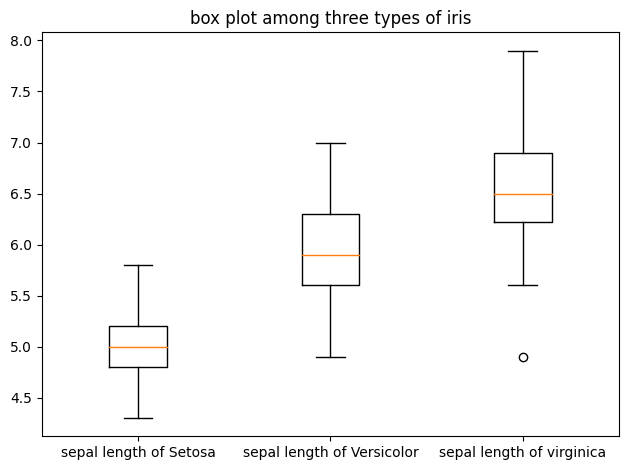

In [167]:
plt.figure(figsize = (6,4))
fig, ax = plt.subplots()
ax.boxplot([df0['sepal length (cm)'], df1['sepal length (cm)'],df2['sepal length (cm)']])
plt.xticks([1,2,3], ['sepal length of Setosa', 'sepal length of Versicolor', 'sepal length of virginica'])
plt.title('box plot among three types of iris')
plt.tight_layout()
plt.show()

# (3) Scatter Plot

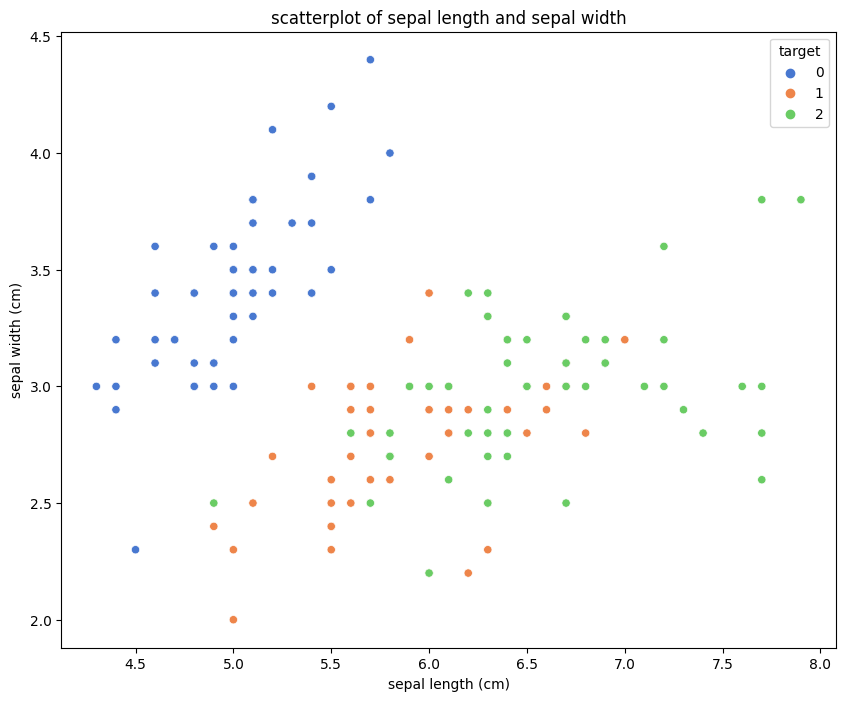

In [168]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue = df['target'], palette = 'muted')
plt.title('scatterplot of sepal length and sepal width')
plt.show()

# (4)Histogram

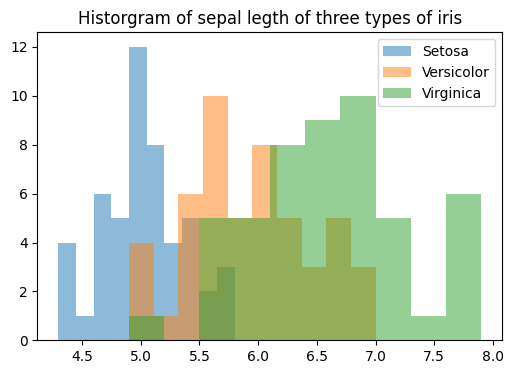

In [169]:
plt.figure(figsize=(6,4))
plt.hist(df0['sepal length (cm)'], alpha = 0.5, label = 'Setosa')
plt.hist(df1['sepal length (cm)'], alpha = 0.5, label = 'Versicolor')
plt.hist(df2['sepal length (cm)'], alpha = 0.5, label = 'Virginica')
plt.title('Historgram of sepal legth of three types of iris')
plt.legend()
plt.show()

# Advanced_Python_week_03

# 01 Correlation Analysis

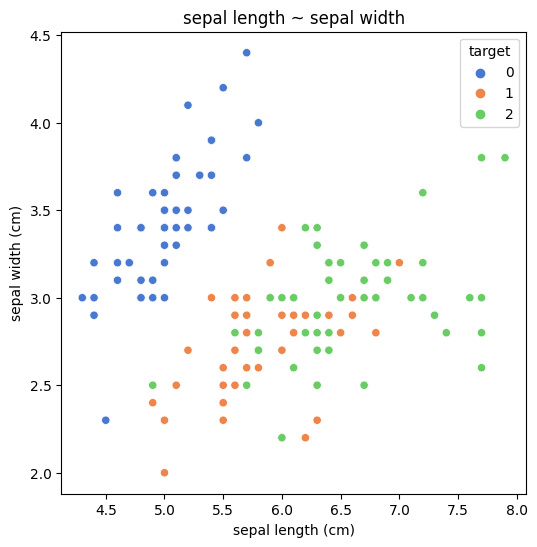

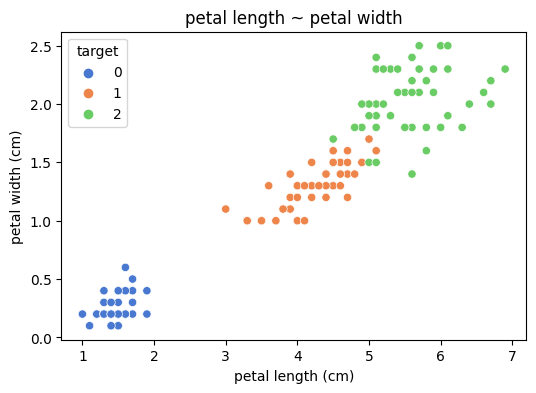

In [170]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                hue=df['target'], palette='muted')
plt.title('sepal length ~ sepal width')
plt.show()
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)',
                hue=df['target'], palette='muted')
plt.title('petal length ~ petal width')
plt.show()

# Pearson correlation

(1) scipy

In [171]:
from scipy.stats import pearsonr

In [172]:
# sepal length ~ sepal width
pearsonr(df['sepal length (cm)'], df['sepal width (cm)'])

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.15189826071144857)

In [173]:
# petal length ~ petal width
pearsonr(df['petal length (cm)'], df['petal width (cm)'])

PearsonRResult(statistic=0.9628654314027969, pvalue=4.6750039073204644e-86)

(2) numpy

In [174]:
# sepal length ~ sepal width
np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])[0][1]

-0.11756978413300198

In [175]:
# petal length ~ petal width
np.corrcoef(df['petal length (cm)'], df['petal width (cm)'])[0][1]

0.9628654314027963

(3) pandas

In [176]:
# iloc (index로 location)
df_sepal = df.iloc[:, :2]
df_sepal.corr(method='pearson')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [177]:
df_petal = df.iloc[:, 2:4]
df_petal.corr(method='pearson')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000


# Spearman Correlation

 (1) scipy

In [178]:
from scipy.stats import spearmanr

In [179]:
# sepal length ~ sepal width
spearmanr(df['sepal length (cm)'], df['sepal width (cm)'])

SignificanceResult(statistic=-0.166777658283235, pvalue=0.04136799424884587)

In [180]:
# petal length ~ petal width
spearmanr(df['petal length (cm)'], df['petal width (cm)'])

SignificanceResult(statistic=0.9376668235763412, pvalue=8.156596854126675e-70)

 (2) pandas

In [181]:
df_sepal.corr(method='spearman')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.000000,-0.166778
sepal width (cm),-0.166778,1.000000


In [182]:
df_petal.corr(method='spearman')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.937667
petal width (cm),0.937667,1.000000


# Normality Test

In [183]:
# Crafting data
rand_normal = np.random.normal(loc=1, scale=2, size=1000)
rand_uniform = np.random.uniform(low=0, high=2, size=1000)
rand_f = np.random.f(dfnum=10, dfden=10, size=1000)

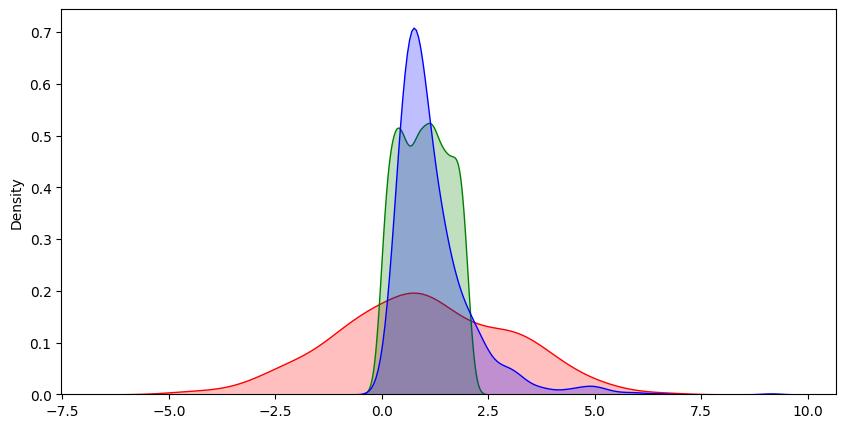

In [184]:
#data plotting
plt.figure(figsize=(10,5))
sns.kdeplot(data=rand_normal, color='red', fill=True)
sns.kdeplot(data=rand_uniform, color='green', fill=True)
sns.kdeplot(data=rand_f, color='blue', fill=True)

plt.show()

# QQplot

In [185]:
import scipy.stats as stats

/var/folders/yz/0g34_v5d6dq2n08tpswpb8sw0000gn/T/ipykernel_83653/3278245815.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=rand_uniform, color='red', label = 'uniform distribution')


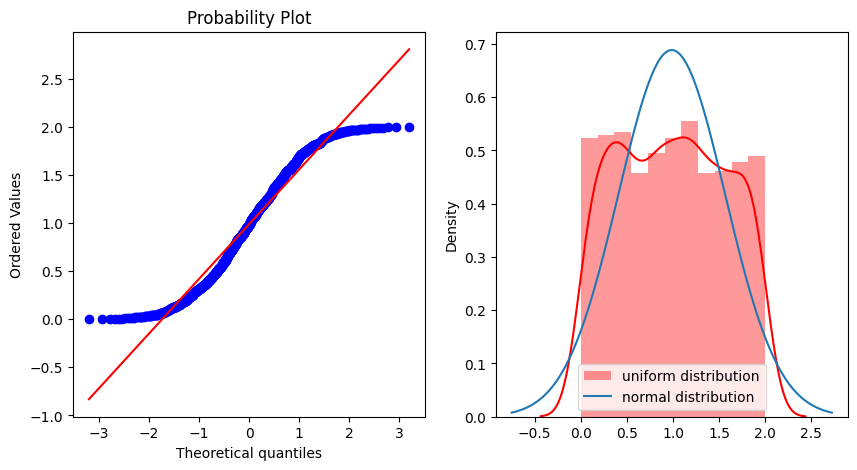

In [186]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## QQ plot
stats.probplot(rand_uniform, dist=stats.norm, plot=ax1)

## normal distribution vs. uniform distribution

# uniform distribution
sns.distplot(ax=ax2, a=rand_uniform, color='red', label = 'uniform distribution')

# normal distribution
mu = rand_uniform.mean() # average
variance = rand_uniform.var()
std = variance**0.5

x = np.linspace(mu-3*std, mu+3*std, 1000)
ax2.plot(x, stats.norm.pdf(x, mu, std), label = 'normal distribution')

ax2.legend()

plt.show()

# Kolmogorov-Sminorv Test

In [187]:
#-H0 (null hypothesis): The sample follows a normal distribution

#-If the KS test yields a p-value less than 0.05, we reject H0, 
#indicating that the sample does not follow a normal distribution.

#-If the KS test yields a p-value greater than 0.05, we fail to reject H0,
#indicating that the sample follows a normal distribution.

In [188]:
stats.kstest(rand_normal, 'norm', args=(rand_normal.mean(), rand_normal.var()**0.5))

KstestResult(statistic=0.027760596483648814, pvalue=0.4164931268503388, statistic_location=1.0419462610934356, statistic_sign=1)

In [189]:
stats.kstest(rand_uniform, 'norm', args=(rand_uniform.mean(), rand_uniform.var()**0.5))

KstestResult(statistic=0.0660494910083837, pvalue=0.0003088833184788767, statistic_location=0.5434126117294127, statistic_sign=1)

In [190]:
stats.kstest(rand_f, 'norm', args=(rand_f.mean(), rand_f.var()**0.5))

KstestResult(statistic=0.14944198187044488, pvalue=5.838173086800714e-20, statistic_location=1.1243040581031771, statistic_sign=1)

# Shapiro-Wilk Test

In [191]:
stats.shapiro(rand_normal)

ShapiroResult(statistic=0.9978631138801575, pvalue=0.22996579110622406)

In [192]:
stats.shapiro(rand_uniform)

ShapiroResult(statistic=0.9558193683624268, pvalue=8.617827687162029e-17)

In [193]:
stats.shapiro(rand_f)

ShapiroResult(statistic=0.7759438753128052, pvalue=7.367002175820784e-35)

# Advanced_Python_week_04

In [194]:
setosa = df[df['target'] == 0]
versicolor = df[df['target'] == 1]
virginica = df[df['target'] == 2]

# 01 Anova

In [195]:
setosa_sep_len = setosa['sepal length (cm)']
versicolor_sep_len = versicolor['sepal length (cm)']
virginica_sep_len = virginica['sepal length (cm)']

In [196]:
newData = pd.concat([df.iloc[:, 0], df.iloc[:, -1]], axis=1)
newData = np.array(newData)

In [197]:
setosa_array = newData[newData[:, 1] == 0]
versicolor_array = newData[newData[:, 1] == 1]
virginica_array = newData[newData[:, 1] == 2]

In [198]:
from scipy import stats

In [199]:
F_statistics, p_val = stats.f_oneway(setosa_array[:, 0],
                                     versicolor_array[:, 0],
                                     virginica_array[:, 0])

In [200]:
print('F statistics is:', F_statistics, 'p-value is:', p_val)


F statistics is: 119.26450218450468 p-value is: 1.6696691907693826e-31


Since the p-value is less than 0.05, we reject H0.

H0 was "the mean sepal length of setosa, versicolor, and virginica are all the same."

By rejecting H0, we can conclude that the mean sepal length of setosa, versicolor, and virginica are different.

# 02 Linear Regression

In [201]:
data = pd.read_csv('train.csv')

In [202]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [203]:
y = data.SalePrice # response variable 
x = data.YearBuilt #predictor variable

In [204]:
x = sm.add_constant(x) # y = ax+b.
x

,const,YearBuilt
0,1.0,2003
1,1.0,1976
2,1.0,2001
3,1.0,1915
4,1.0,2000
...,...,...
1455,1.0,1999
1456,1.0,1978
1457,1.0,1941
1458,1.0,1950


In [205]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.99e-103
Time:                        17:33:31   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

# 02-1 predicting value

In [206]:
y = data.SalePrice
x = data.YearBuilt
x.values.reshape(-1, 1)

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]])

In [207]:
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [208]:
model.predict([[2023]])[0]

252072.27990397625

# Advanced_Python_week_05

In [209]:
seto = df[df['target']==0]
versi = df[df['target']==1]
virgi = df[df['target']==2]

In [210]:
seto_sepal_length = seto['sepal length (cm)']
versi_sepal_length = versi['sepal length (cm)']

# normality test

In [211]:
from scipy import stats

In [212]:
stats.shapiro(seto_sepal_length)
# cant reject HO so it follows the normal distribution

ShapiroResult(statistic=0.9776986837387085, pvalue=0.4595174193382263)

In [213]:
stats.shapiro(versi_sepal_length)
# cant reject HO so it follows the normal distribution

ShapiroResult(statistic=0.9778358340263367, pvalue=0.46474313735961914)

# Homogeneity of variance test

In [214]:
stats.levene(seto_sepal_length, versi_sepal_length)
#reject HO the variance is different

LeveneResult(statistic=8.172720533728683, pvalue=0.005195521631017526)

# t-test

In [215]:
stats.ttest_ind(seto_sepal_length, versi_sepal_length, equal_var = False)
#since smaller 0than 0.05 it rejects HO and means the avg is different

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

# Advanced_Python_week_06

In [216]:
data = pd.read_csv('train.csv')

# 01 Multiple Linear Regression

In [217]:
data_new = data[['YearBuilt', 'LotFrontage', 'LotArea', 'SalePrice']].dropna()

In [218]:
y = data_new.SalePrice
X = data_new[['YearBuilt', 'LotFrontage', 'LotArea']]

In [219]:
X = sm.add_constant(X)

In [220]:
# make linear regression model
model_sm = sm.OLS(y, X).fit()

In [221]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.13e-134
Time:                        17:33:35   Log-Likelihood:                -15000.
No. Observations:                1201   AIC:                         3.001e+04
Df Residuals:                    1197   BIC:                         3.003e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.497e+06   1.16e+05    -21.579      0.000   -2.72e+06   -2.27e+06
YearBuilt    1323.0906     58.980     22.433      0.000    1207.375    1438.806
LotFrontage   703.2789     85.131      8.261      0.000     536.256     870.302
LotArea         2.0955      0.259      8.084      0.000       1.587       2.604
==============================================================================
Omnibus:                      545.978   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5166.920
Skew:                           1.860   Prob(JB):                         0.00
Kurtosis:                      12.456   Cond. No.                     7.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Advanced_Python_week_07

In [222]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
sex_mapping = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [224]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [225]:
# imputaion with median value
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [226]:
df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [227]:
embarked_mapping = {'Q':0, 'S':1, 'C':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [228]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [229]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR
fare_outliers = df[(df['Fare'] < Q1-whisker_width*IQR)|(df['Fare'] > Q3+whisker_width*IQR)]

In [230]:
fare_outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2
27,0,1,0,19.0,3,2,263.0000,1
31,1,1,1,24.0,1,0,146.5208,2
34,0,1,0,28.0,1,0,82.1708,2
52,1,1,1,49.0,1,0,76.7292,2
...,...,...,...,...,...,...,...,...
846,0,3,0,24.0,8,2,69.5500,1
849,1,1,1,24.0,1,0,89.1042,2
856,1,1,1,45.0,1,1,164.8667,1
863,0,3,1,24.0,8,2,69.5500,1


In [231]:
Fare_no_ouliers = df[(df['Fare'] > lower_whisker)&(df['Fare'] < upper_whisker)]

df = Fare_no_ouliers.reset_index().iloc[:, 1:]
corr_mat = df.corr(method='pearson')

In [232]:
corr_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.499888
Fare        0.234422
Parch       0.098575
Embarked    0.050164
SibSp      -0.003156
Age        -0.109055
Pclass     -0.238532
Name: Survived, dtype: float64

In [233]:
df.drop(['Embarked', 'SibSp'],axis=1, inplace=True)

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
scaler = StandardScaler()

In [236]:
fare_array = np.array(df['Fare']).reshape(-1,1)

In [237]:
scaler.fit(fare_array)

StandardScaler()

In [238]:
df['Fare'] = pd.Series(scaler.transform(fare_array).reshape(-1))


# Logistic Regression

In [239]:
features = df[['Pclass', 'Sex', 'Age', 'Parch', 'Fare']] #df
target = df['Survived'] #pandas series

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
train_features, test_features, train_labels, test_labels = train_test_split(features, target)

In [242]:
scaler = StandardScaler()

In [243]:
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
model = LogisticRegression()

In [246]:
model.fit(train_features, train_labels)


LogisticRegression()

In [247]:
print(model.score(test_features, test_labels))
#model performance

0.7938144329896907


In [248]:
#predict survival
Jack = np.array([3, 0, 20, 0, 70])
Rose = np.array([2, 1, 17, 1, 70])
me = np.array([2, 1, 26, 1, 80])

In [249]:
sample_passengers = np.array([Jack, Rose, me])

In [250]:
#scaling
scaler = StandardScaler()
sample_passengers = scaler.fit_transform(sample_passengers)

In [251]:
#prediction
print(model.predict(sample_passengers))

[0 1 0]


# SVM

In [252]:
from sklearn.svm import SVC

In [253]:
#kernel difference
svm_linear = SVC(kernel = 'linear', C = 8, gamma =1)
svm_poly = SVC(kernel = 'poly', C = 8, gamma =1)
svm_rbf = SVC(kernel = 'rbf', C = 8, gamma =1)

In [254]:
svm_linear.fit(train_features, train_labels)
svm_poly.fit(train_features, train_labels)
svm_rbf.fit(train_features, train_labels)

SVC(C=8, gamma=1)

In [255]:
## predict
y_pred_linear = svm_linear.predict(test_features)
y_pred_poly = svm_poly.predict(test_features)
y_pred_rbf = svm_rbf.predict(test_features)

In [256]:
np.mean(y_pred_linear == test_labels.values)

0.8041237113402062

In [257]:
print("prediction accuracy of linear kernel : {0}".format(np.mean(y_pred_linear == test_labels.values)))
print("prediction accuracy of polynomial kernel : {0}".format(np.mean(y_pred_poly == test_labels.values)))
print("prediction accuracy of rbf kernel : {0}".format(np.mean(y_pred_rbf == test_labels.values)))

prediction accuracy of linear kernel : 0.8041237113402062
prediction accuracy of polynomial kernel : 0.7989690721649485
prediction accuracy of rbf kernel : 0.7835051546391752


# Advanced_Python_week_08

# KNN

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
features = iris['data']
feature_names = iris['feature_names']
label = iris['target']

df = pd.DataFrame(features, columns = feature_names)
df['target'] = label

In [259]:
#preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [260]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [262]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [263]:
y_pred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 1])

In [264]:
#evaluating
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.97        14
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Advanced_Python_week_09

In [265]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ['PATH'] = os.pathsep+'/opt/homebrew/bin'

# Decesion Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [267]:
tree_model = DecisionTreeClassifier(max_depth=3) # tree model generated


In [268]:
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [269]:
dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = df.columns[:-1],
    class_names = df.columns[-1],
    rounded = True, 
    filled = True
)

In [270]:
graph = graphviz.Source(dot_data)


In [271]:
graph.render(filename = 'iris_decision_tree', directory='./', format='png')


'iris_decision_tree.png'

In [272]:
import inspect
print(inspect.getfile(graphviz))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/graphviz/__init__.py


# Advanced_Python_week_10

# Random forest

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [274]:
rf = RandomForestClassifier()


In [275]:
rf.fit(X_train,  y_train)


RandomForestClassifier()

In [276]:
prediction = rf.predict(X_test)
prediction

array([2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 1])

In [277]:
prediction == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [278]:
print("accuracy of random forest (default setting): " , np.sum(prediction==y_test)/len(y_test))

accuracy of random forest (default setting):  1.0


# XG boost

In [279]:
from xgboost import XGBClassifier

In [280]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [281]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [282]:
from sklearn import metrics


In [283]:
y_pred = xgb.predict(X_test)
y_pred

array([2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 1])

In [284]:
from sklearn import metrics

In [285]:
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [286]:
xgb.feature_importances_
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [287]:
import xgboost

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

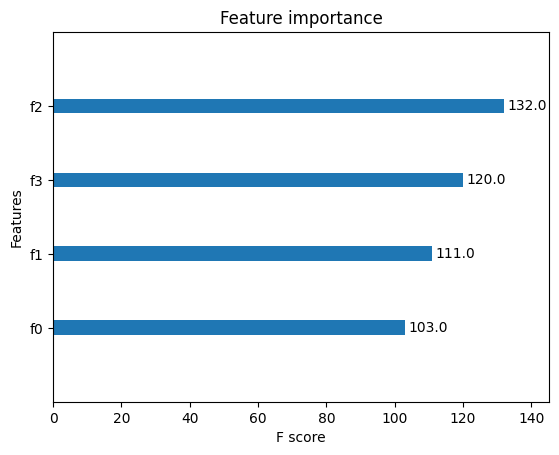

In [288]:
xgboost.plot_importance(xgb, grid=False)

# Advanced_Python_week_11

# K fold cross validation (CV)

In [289]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [290]:

kfold = KFold(n_splits=5)

In [291]:
scores = cross_val_score(rf, features, label, cv=kfold)


In [292]:
print('fold accuracy: ', scores)


fold accuracy:  [1.         1.         0.86666667 0.93333333 0.73333333]


In [293]:
print('fold mean accuracy: ', np.mean(scores))


fold mean accuracy:  0.9066666666666666


# Grid search & K fold CV

In [294]:
from sklearn.model_selection import GridSearchCV

In [295]:
param_grid = {
    'n_estimators' : [100, 150, 200, 250],
    'max_depth' : [None, 6, 9, 12],
    'min_samples_split' : [0.01, 0.05, 0.1],
    'max_features' : ['auto', 'sqrt']
}


In [296]:
#model
rf2 = RandomForestClassifier()

In [297]:
kfold2 = KFold(n_splits = 10)

In [298]:
grid_search = GridSearchCV(estimator = rf2,
                           param_grid = param_grid,
                           cv = kfold2)

In [299]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [301]:
grid_search.fit(features, label)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 6, 9, 12],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250]})

In [303]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 100}

In [304]:
#best params
rf_best = RandomForestClassifier(max_depth=None,
                                 max_features= 'auto',
                                 min_samples_split= 0.01,
                                 n_estimators= 100)

# Advanced_Python_week_12

# PCA

In [305]:
from sklearn.decomposition import PCA

In [306]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [307]:
print(pca.explained_variance_)

[4.22824171 0.24267075]


In [308]:
PCscore = pca.transform(X)

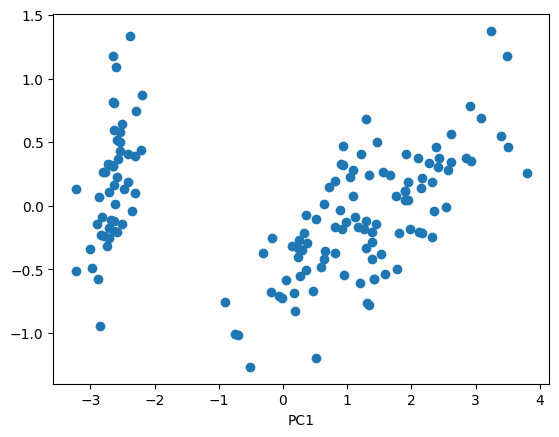

In [309]:
#PC score scatter plot
plt.scatter(PCscore[:,0], PCscore[:,1])
plt.xlabel('PC1')
plt.show()

# TSNE

In [310]:
from sklearn.manifold import TSNE

In [311]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

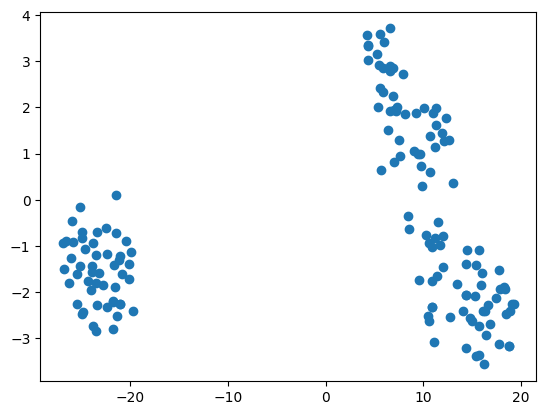

In [312]:
plt.scatter(tsne_result[:,0], tsne_result[:,1])
plt.show()

# Advanced_Python_week_13

# ANN

In [313]:
def relu(x):
    return np.maximum(0, x)
def step_function(x):
    return np.array(x>0)
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [314]:
x = np.array([1, 0.5])
x.shape

(2,)

In [315]:
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
w1.shape
np.dot(x, w1).shape

(3,)

In [316]:
b1 = np.array([0.1, 0.2, 0.3])
b1.shape

(3,)

In [317]:
a1 = np.dot(x, w1)+b1

In [318]:
z1 = sigmoid(a1)

In [319]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 신경망의 출력 (예측값)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답

In [320]:
len_y = len(y)

def loss_squared_error(len_y,y,t):
    sum = 0
    for i in range(len_y):
        error = y[i] - t[i]
        sum += (error)**2
    MSE = sum / len_y      
    return(MSE)

print(loss_squared_error(len_y,y,t))

0.019500000000000007


# Optimzer(tensor flow)

In [321]:
import tensorflow as tf

In [322]:
tf.keras.optimizers.Adam(learning_rate=0.001)

In [323]:
tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [324]:
tf.keras.optimizers.AdamW(learning_rate=0.001)

In [325]:
tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Advanced_Python_week_14

# Deep learning

In [326]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [327]:
#model
model = keras.Sequential([keras.layers.Dense(units=1, input_shape= [1])])

In [328]:
#optimzer and loss function
model.compile(optimizer='sgd', loss='mean_squared_error')

In [329]:
#data input
xs = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys = np.array([-3, -1, 1, 3, 5, 7], dtype=float)

In [330]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 102ms/step - loss: 10.1109
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 8.1662
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 6.6319
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 5.4206
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 4.4634
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 3.7062
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 3.1065
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 2.6308
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2526
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 1.9514
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7107
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 1.5178
Epoch 13/500
1/1 [==============================] - 0s 1ms

1/1 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 105/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1268
Epoch 106/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1242
Epoch 107/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1216
Epoch 108/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1191
Epoch 109/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 110/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1143
Epoch 111/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1119
Epoch 112/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1096
Epoch 113/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1074
Epoch 114/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1052
Epoch 115/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1030
Epoch 116/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 207/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 208/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 209/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 210/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 211/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 212/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 213/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 214/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 215/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 216/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 217/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 218/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 309/500
1/1 [==============================] - 0s 941us/step - loss: 0.0018
Epoch 310/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 311/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 312/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 313/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 314/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 315/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 316/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 317/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 318/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 319/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 320/500
1/1 [==============================] -

1/1 [==============================] - 0s 1ms/step - loss: 2.4036e-04
Epoch 408/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3542e-04
Epoch 409/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3059e-04
Epoch 410/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2585e-04
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 2.2121e-04
Epoch 412/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1667e-04
Epoch 413/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1222e-04
Epoch 414/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0786e-04
Epoch 415/500
1/1 [==============================] - 0s 1ms/step - loss: 2.0359e-04
Epoch 416/500
1/1 [==============================] - 0s 1ms/step - loss: 1.9941e-04
Epoch 417/500
1/1 [==============================] - 0s 1ms/step - loss: 1.9531e-04
Epoch 418/500
1/1 [==============================] - 0s 998us/step - loss: 1.9130e-04
Epoc

In [331]:
print(model.predict([10])) # since y=2x-1 it should be 19

1/1 [==============================] - 0s 34ms/step
[[18.982769]]


# ANN with image data

In [332]:
fashion_mnist = keras.datasets.fashion_mnist

In [333]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [334]:
# class names define
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [335]:
train_images.shape # 60000 data is inside at its in 28x28 bits

(60000, 28, 28)

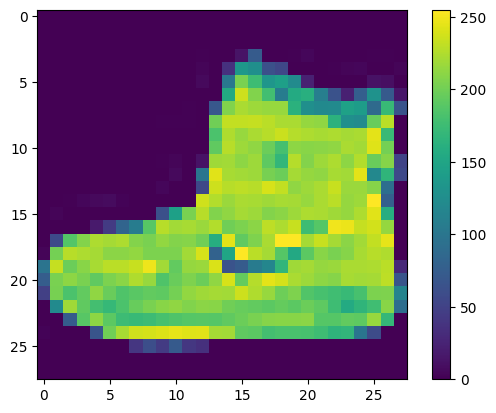

In [336]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [337]:
#preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

In [338]:
# model define
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [339]:
#compile
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [340]:
#model training
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 1s 545us/step - loss: 0.4982 - accuracy: 0.8250
Epoch 2/50
1875/1875 [==============================] - 1s 541us/step - loss: 0.3738 - accuracy: 0.8646
Epoch 3/50
1875/1875 [==============================] - 1s 538us/step - loss: 0.3373 - accuracy: 0.8776
Epoch 4/50
1875/1875 [==============================] - 1s 538us/step - loss: 0.3133 - accuracy: 0.8838
Epoch 5/50
1875/1875 [==============================] - 1s 540us/step - loss: 0.2969 - accuracy: 0.8896
Epoch 6/50
1875/1875 [==============================] - 1s 538us/step - loss: 0.2813 - accuracy: 0.8954
Epoch 7/50
1875/1875 [==============================] - 1s 567us/step - loss: 0.2673 - accuracy: 0.9011
Epoch 8/50
1875/1875 [==============================] - 1s 548us/step - loss: 0.2581 - accuracy: 0.9036
Epoch 9/50
1875/1875 [==============================] - 1s 542us/step - loss: 0.2493 - accuracy: 0.9066
Epoch 10/50
1875/1875 [==============================] - 1s 530u

In [341]:
#model performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy: ', test_acc)

313/313 [==============================] - 0s 378us/step - loss: 0.5367 - accuracy: 0.8861
test accuracy:  0.8860999941825867


In [342]:
#predicting values with model
predictions = model.predict(test_images)

313/313 [==============================] - 0s 327us/step


In [343]:
np.argmax(predictions[0])

9

In [344]:
test_labels[0]

9

Same value

# Advanced_python_week_15

# MLP

In [345]:
#loading data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [346]:
class MLP(keras.Model):
    def __init__(self):
        # layer 정의

        super(MLP, self).__init__()

        self.flatten = keras.layers.Flatten(input_shape=(28,28))
        self.dense1 = keras.layers.Dense(512, activation='relu')
        self.dense2 = keras.layers.Dense(256, activation='relu')
        self.out = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.out(x)

In [347]:
# Create an instance of the model
model = MLP()

In [348]:
#defining loss, optimizer 
learning_rate = 1e-4
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) # multi-label classification 문제라서
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

In [349]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.build(input_shape=(1, 28, 28, 1)) # (batch, height, width, channel) 
model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  401920    
                                                                 
 dense_4 (Dense)             multiple                  131328    
                                                                 
 dense_5 (Dense)             multiple                  2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [351]:
# model traing
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0829 - accuracy: 0.9858
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0637 - accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0506 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0390 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0304 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0240 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0146 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0113 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.009

In [352]:
#evaluating model performance
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 655us/step - loss: 0.5598 - accuracy: 0.9472


[0.5598259568214417, 0.9472000002861023]

In [353]:
hist.history['accuracy'] # The model we trained has accuracy data for every epoch

[0.9858166575431824,
 0.9887499809265137,
 0.9911166429519653,
 0.9926166534423828,
 0.9945999979972839,
 0.9957500100135803,
 0.9968166947364807,
 0.9976166486740112,
 0.9983333349227905,
 0.9987499713897705]

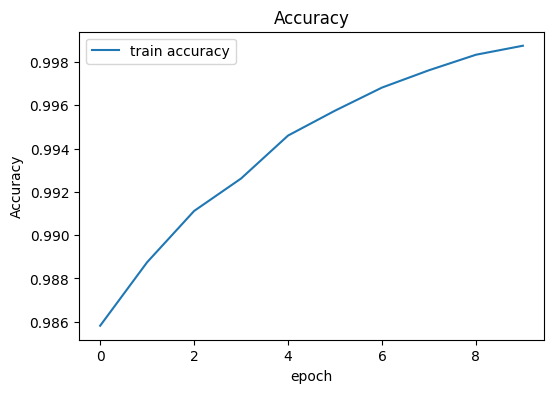

In [354]:
# accuracy curve (How did accuracy improve over epoch)
plt.figure(figsize=(6,4))
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [355]:
hist.history['loss'] # same thing for loss 

[0.08291234821081161,
 0.06370731443166733,
 0.050615906715393066,
 0.03904876485466957,
 0.03041563183069229,
 0.023994827643036842,
 0.01822841167449951,
 0.014601632952690125,
 0.011306645348668098,
 0.009131573140621185]

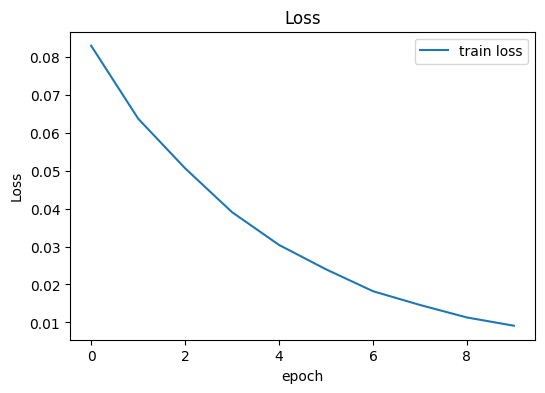

In [356]:
# loss curve
plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='train loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# CNN

In [357]:
import pathlib

In [358]:
#load data
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [359]:
data_dir = keras.utils.get_file(origin=dataset_url,
                               fname='flower_photos',
                               untar=True)
data_dir = pathlib.Path(data_dir)

In [360]:
#preprocessing
train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='training',
seed=2023,
image_size=(224, 224),
batch_size=32)

test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='training',
seed=2023,
image_size=(224, 224),
batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# exploring data
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulibs']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
plt.tight_layout()

In [ ]:
class CNN(keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        
        # layer
        self.cnn1 = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(224,224,3))
        self.pool1 = keras.layers.MaxPooling2D((2,2))
        self.cnn2 = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.pool2 = keras.layers.MaxPooling2D((2,2))
        
        self.flat = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(128, activation='relu')  # corrected here
        self.out = keras.layers.Dense(5, activation='softmax')
    
    def call(self, x):
        x = self.cnn1(x)
        x = self.pool1(x)
        x = self.cnn2(x)
        x = self.pool2(x)    
        x = self.flat(x)
        x = self.fc1(x)
        
        return self.out(x)


In [ ]:
model = CNN() #model instance

In [364]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [365]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10, batch_size=32)

Epoch 1/10
92/92 [==============================] - 51s 549ms/step - loss: 362.8278 - accuracy: 0.2554 - val_loss: 1.4473 - val_accuracy: 0.4731
Epoch 2/10
92/92 [==============================] - 49s 531ms/step - loss: 1.3720 - accuracy: 0.4588 - val_loss: 1.0866 - val_accuracy: 0.6379
Epoch 3/10
92/92 [==============================] - 51s 550ms/step - loss: 0.8827 - accuracy: 0.6802 - val_loss: 0.6641 - val_accuracy: 0.7813
Epoch 4/10
92/92 [==============================] - 47s 504ms/step - loss: 0.5159 - accuracy: 0.8324 - val_loss: 0.5167 - val_accuracy: 0.8351
Epoch 5/10
92/92 [==============================] - 46s 495ms/step - loss: 0.3204 - accuracy: 0.8978 - val_loss: 0.3223 - val_accuracy: 0.9002
Epoch 6/10
92/92 [==============================] - 47s 507ms/step - loss: 0.3047 - accuracy: 0.9097 - val_loss: 0.4363 - val_accuracy: 0.8573
Epoch 7/10
92/92 [==============================] - 44s 481ms/step - loss: 0.2443 - accuracy: 0.9240 - val_loss: 0.2867 - val_accuracy: 0.93

In [369]:
# model evaluation
model.evaluate(test_ds)

92/92 [==============================] - 10s 105ms/step - loss: 0.1416 - accuracy: 0.9584


[0.14164255559444427, 0.9584468603134155]

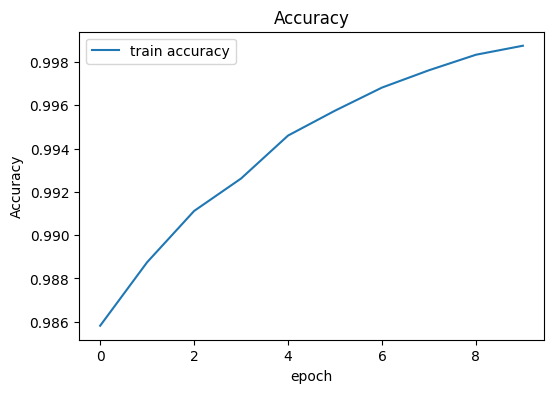

In [370]:
plt.figure(figsize=(6,4))
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

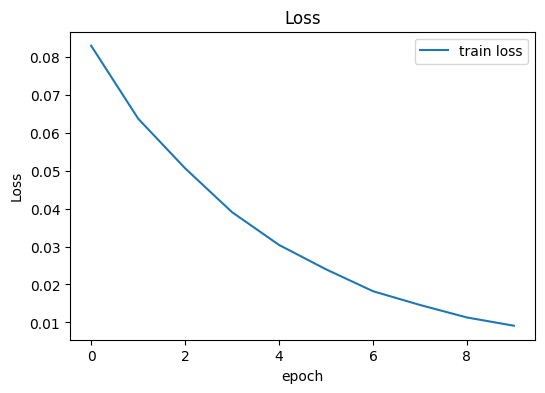

In [371]:
# loss curve
plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='train loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()